In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('online_retail.csv')
df.sample(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
251225,513625,21619,4 VANILLA BOTANICAL CANDLES,2,2010-06-27 13:09:00,3.75,14505.0,United Kingdom
940935,572540,21080,SET/20 RED RETROSPOT PAPER NAPKINS,2,2011-10-24 16:17:00,2.46,NaN,United Kingdom
562893,539464,16169P,WRAP GREEN RUSSIAN FOLKART,25,2010-12-19 11:35:00,0.42,17913.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [8]:
df.isnull().sum().sum()

247389

In [9]:
df = df.dropna(subset=['Customer ID'])

In [10]:
df['Customer ID'] = df['Customer ID'].astype('int64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  int64         
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 56.6+ MB


In [12]:
df['LastPurchaseMonth'] = df['InvoiceDate'].dt.to_period('M')

In [13]:
df['CohortMonth'] = df.groupby('Customer ID')['InvoiceDate'].transform('min').dt.to_period('M')
df.sample(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,LastPurchaseMonth,CohortMonth
232888,511957,22294,HEART FILIGREE DOVE SMALL,24,2010-06-11 13:18:00,1.25,16497,United Kingdom,2010-06,2009-12
797300,560723,22907,PACK OF 20 NAPKINS PANTRY DESIGN,2,2011-07-20 13:53:00,0.85,16464,United Kingdom,2011-07,2011-07
510741,537055,21754,HOME BUILDING BLOCK WORD,6,2010-12-05 11:45:00,5.95,16814,United Kingdom,2010-12,2010-04


In [14]:
df ['CohortIndex'] = (df['LastPurchaseMonth'] - df['CohortMonth']).apply(lambda x: x.n)
df.sample(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,LastPurchaseMonth,CohortMonth,CohortIndex
168275,505341,21232,STRAWBERRY CERAMIC TRINKET BOX,12,2010-04-21 13:21:00,1.06,17448,United Kingdom,2010-04,2010-03,1
182532,506715,84837,WHITE SWEETHEARTS CABINET 4 DRAWERS,18,2010-05-02 15:48:00,10.75,13113,United Kingdom,2010-05,2010-03,2
91958,498060,21871,SAVE THE PLANET MUG,2,2010-02-16 12:13:00,1.25,17287,United Kingdom,2010-02,2009-12,2


In [15]:
df_cohort = df.groupby(['CohortMonth', 'CohortIndex'])['Customer ID'].nunique().reset_index()
df_cohort

,CohortMonth,CohortIndex,Customer ID
0,2009-12,0,1045
1,2009-12,1,392
2,2009-12,2,358
3,2009-12,3,447
4,2009-12,4,410
...,...,...,...
320,2011-10,1,74
321,2011-10,2,39
322,2011-11,0,192
323,2011-11,1,33


In [16]:
piv_cohort = df_cohort.pivot_table(index='CohortMonth', columns='CohortIndex', values='Customer ID')
piv_cohort

CohortIndex,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2009-12,1045.0,392.0,358.0,447.0,410.0,408.0,408.0,374.0,355.0,392.0,...,319.0,273.0,316.0,303.0,287.0,274.0,332.0,319.0,427.0,218.0
2010-01,394.0,86.0,119.0,120.0,110.0,115.0,105.0,91.0,114.0,134.0,...,60.0,86.0,74.0,69.0,73.0,93.0,73.0,88.0,29.0,NaN
2010-02,363.0,109.0,82.0,110.0,93.0,76.0,79.0,103.0,100.0,106.0,...,74.0,67.0,61.0,53.0,85.0,90.0,62.0,23.0,NaN,NaN
2010-03,436.0,95.0,113.0,103.0,100.0,87.0,105.0,130.0,126.0,50.0,...,74.0,76.0,69.0,74.0,89.0,93.0,33.0,NaN,NaN,NaN
2010-04,291.0,67.0,58.0,47.0,54.0,67.0,79.0,76.0,33.0,34.0,...,43.0,41.0,41.0,50.0,61.0,19.0,NaN,NaN,NaN,NaN
2010-05,254.0,49.0,45.0,49.0,48.0,66.0,56.0,33.0,17.0,22.0,...,33.0,36.0,42.0,40.0,12.0,NaN,NaN,NaN,NaN,NaN
2010-06,269.0,58.0,53.0,55.0,62.0,76.0,35.0,25.0,22.0,32.0,...,33.0,37.0,55.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,183.0,38.0,37.0,52.0,55.0,28.0,21.0,28.0,26.0,22.0,...,32.0,45.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,158.0,39.0,50.0,51.0,29.0,21.0,16.0,22.0,23.0,21.0,...,32.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
cohort_size = piv_cohort.iloc[:, 0]
retention_matrix = piv_cohort.divide(cohort_size, axis=0)
retention_matrix

CohortIndex,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2009-12,1.0,0.375120,0.342584,0.427751,0.392344,0.390431,0.390431,0.357895,0.339713,0.375120,...,0.305263,0.261244,0.302392,0.289952,0.274641,0.262201,0.317703,0.305263,0.408612,0.208612
2010-01,1.0,0.218274,0.302030,0.304569,0.279188,0.291878,0.266497,0.230964,0.289340,0.340102,...,0.152284,0.218274,0.187817,0.175127,0.185279,0.236041,0.185279,0.223350,0.073604,NaN
2010-02,1.0,0.300275,0.225895,0.303030,0.256198,0.209366,0.217631,0.283747,0.275482,0.292011,...,0.203857,0.184573,0.168044,0.146006,0.234160,0.247934,0.170799,0.063361,NaN,NaN
2010-03,1.0,0.217890,0.259174,0.236239,0.229358,0.199541,0.240826,0.298165,0.288991,0.114679,...,0.169725,0.174312,0.158257,0.169725,0.204128,0.213303,0.075688,NaN,NaN,NaN
2010-04,1.0,0.230241,0.199313,0.161512,0.185567,0.230241,0.271478,0.261168,0.113402,0.116838,...,0.147766,0.140893,0.140893,0.171821,0.209622,0.065292,NaN,NaN,NaN,NaN
2010-05,1.0,0.192913,0.177165,0.192913,0.188976,0.259843,0.220472,0.129921,0.066929,0.086614,...,0.129921,0.141732,0.165354,0.157480,0.047244,NaN,NaN,NaN,NaN,NaN
2010-06,1.0,0.215613,0.197026,0.204461,0.230483,0.282528,0.130112,0.092937,0.081784,0.118959,...,0.122677,0.137546,0.204461,0.059480,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,1.0,0.207650,0.202186,0.284153,0.300546,0.153005,0.114754,0.153005,0.142077,0.120219,...,0.174863,0.245902,0.092896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,1.0,0.246835,0.316456,0.322785,0.183544,0.132911,0.101266,0.139241,0.145570,0.132911,...,0.202532,0.069620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


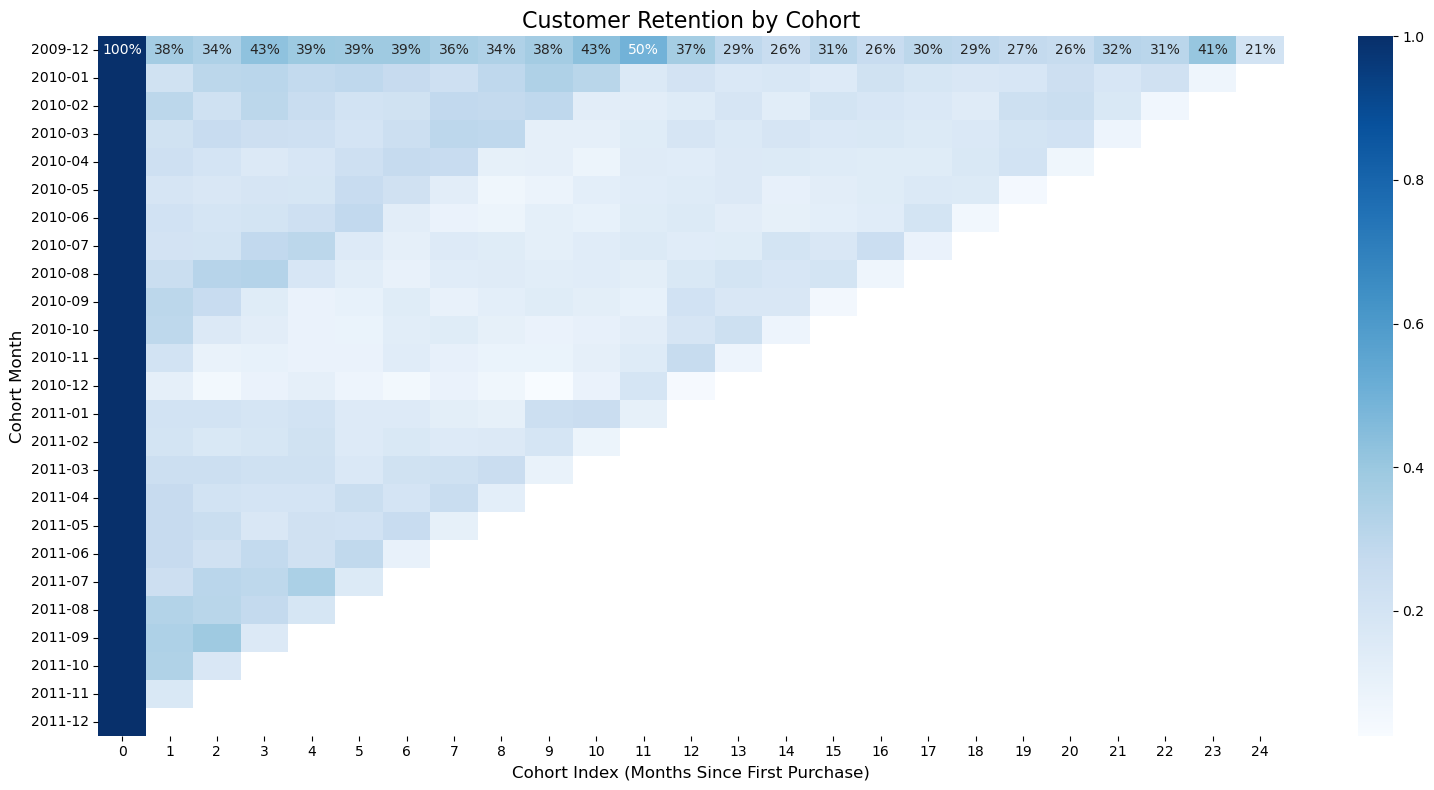

In [22]:
plt.figure(figsize=(16, 8))
sns.heatmap(retention_matrix, annot=True, fmt=".0%", cmap="Blues", annot_kws={"size": 10})
plt.title('Customer Retention by Cohort', fontsize=16)
plt.ylabel('Cohort Month', fontsize=12)
plt.xlabel('Cohort Index (Months Since First Purchase)', fontsize=12)

plt.tight_layout()

plt.show()


In [ ]:
#https://www.kaggle.com/code/ehsansepahsalari/cohort-analysis